In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#import
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
from PIL import Image

#chemin vers le dataset
#chaque label est contenu dans un dossier
data_directory = "/content/gdrive/MyDrive/cl"

#initialisation des listes pour les images et les étiquettes
images = []
labels = []

#parcourt chaque classe dans le répertoire de données
for class_name in os.listdir(data_directory):
    class_directory = os.path.join(data_directory, class_name)

    #parcourt les fichiers d'images dans chaque classe
    for image_filename in os.listdir(class_directory):
        image_path = os.path.join(class_directory, image_filename)

        #lire l'image
        image = Image.open(image_path)

        #dimensions de l'image d'origine
        width, height = image.size

        #dimension maximale (largeur ou hauteur) pour la nouvelle image carrée
        max_dimension = max(width, height)

        #nouvelle image carrée blanche avec la taille maximale
        new_image = Image.new('RGB', (max_dimension, max_dimension), (255, 255, 255))  # (255, 255, 255) représente la couleur blanche

        #coordonnées où coller l'image d'origine au centre de la nouvelle image
        x_offset = (max_dimension - width) // 2
        y_offset = (max_dimension - height) // 2

        #collage l'image d'origine au centre de la nouvelle image
        new_image.paste(image, (x_offset, y_offset))


        #redimmentionement de l'image
        resized_image = np.array(new_image.resize((100,100)))


        #ajout de l'image et de son étiquette aux listes
        images.append(resized_image)
        #fait correspondre chaque boite a un label
        label_to_id = {'ID7685': 0, 'ID7708': 1, 'ID7710': 2, 'ID7711': 3, 'ID7712': 4, 'ID7716': 5, 'ID7726': 6, 'ID7757': 7, 'ID7759': 8, 'ID7852': 9, 'ID7895': 10}
        #label_to_id = {'1': 0, '2': 1, '3': 2, '6': 3, '7': 4, '8': 5, '9': 6, '10': 7, '11': 8, '12': 9, '13': 10}
        #label_to_id = {'A1': 0, 'A2': 1, 'A4': 2, 'A5': 3, 'A6': 4, 'B1': 5, 'B2': 6, 'B3': 7, 'C1': 8, 'C2': 9, 'D1': 10, 'D2': 11, 'D3': 12, 'D4': 13, 'E1': 14, 'E2': 15, 'F1': 16, 'F2': 17, 'G1': 18, 'H1': 19, 'H2': 20, 'H3': 21}
        #label_to_id = {'A1': 0, 'A2': 1, 'A3': 2, 'B1': 3, 'B2': 4, 'B3': 5, 'C1': 6, 'C2': 7, 'C3': 8, 'C4': 9, 'C5': 10, 'C6': 11, 'D1': 12, 'D2': 13}
        labels.append(label_to_id[class_name])


#convertir les listes en tableaux numpy
images = np.array(images)
labels = np.array(labels)



In [ ]:
tabb = []

In [ ]:
model = keras.Sequential()

# Couche de convolution 1
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu',input_shape=(100, 100, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))

# Couche de convolution 2
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

# Couche de convolution 3
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

# Couche de convolution 4
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))

# Applatissement des données pour les couches entièrement connectées
model.add(keras.layers.Flatten())


# Couches entièrement connectées
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(11, activation='softmax'))  # nb de classes


In [ ]:
#compilation du modele
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
#division du dataset en train et test set
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2,stratify=labels)

In [ ]:
#faire apprendre le modele avec les donnees du train set
history = model.fit(train_images, train_labels, epochs=20, batch_size=32)


Epoch 1/20
6/6 [==============================] - 2s 13ms/step - loss: 37.1879 - accuracy: 0.0909
Epoch 2/20
6/6 [==============================] - 0s 13ms/step - loss: 2.4514 - accuracy: 0.2970
Epoch 3/20
6/6 [==============================] - 0s 11ms/step - loss: 1.8516 - accuracy: 0.4061
Epoch 4/20
6/6 [==============================] - 0s 11ms/step - loss: 1.1669 - accuracy: 0.6485
Epoch 5/20
6/6 [==============================] - 0s 12ms/step - loss: 0.7279 - accuracy: 0.7818
Epoch 6/20
6/6 [==============================] - 0s 9ms/step - loss: 0.8508 - accuracy: 0.7636
Epoch 7/20
6/6 [==============================] - 0s 9ms/step - loss: 0.5130 - accuracy: 0.8606
Epoch 8/20
6/6 [==============================] - 0s 9ms/step - loss: 0.5750 - accuracy: 0.8485
Epoch 9/20
6/6 [==============================] - 0s 10ms/step - loss: 0.2307 - accuracy: 0.9576
Epoch 10/20
6/6 [==============================] - 0s 9ms/step - loss: 0.1074 - accuracy: 0.9818
Epoch 11/20
6/6 [===============

In [ ]:
#calculer la precision du modele avec le test set
loss, accuracy = model.evaluate(test_images, test_labels, verbose=0)

#affichez la précision
print("Précision sur l'ensemble de test : {:.2f}%".format(accuracy * 100))
tabb.append(accuracy)

Précision sur l'ensemble de test : 92.73%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

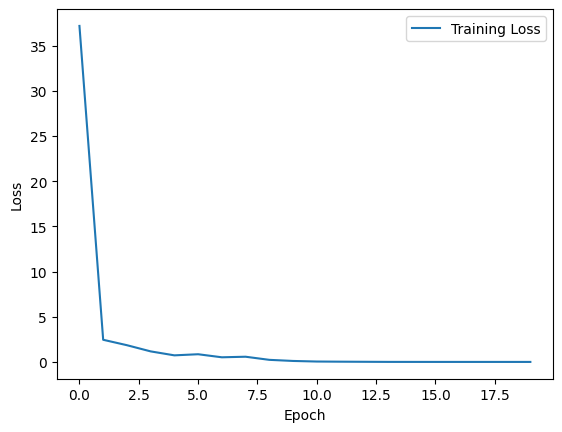

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

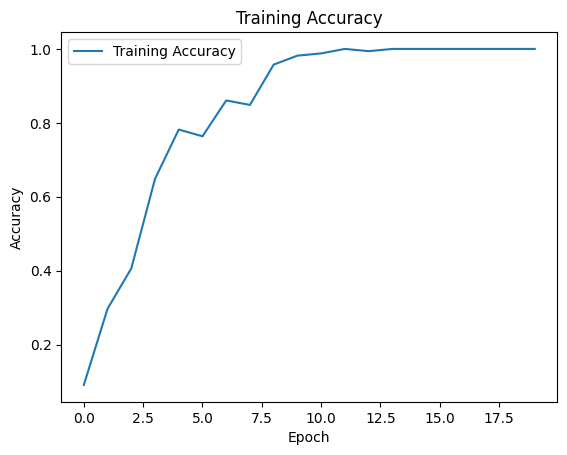

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

#visualisation de la fonction de perte
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.savefig('cl2losst.png')
files.download('cl2losst.png')
plt.show()
#visualisation de la précision
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig('cl2acct.png')
files.download('cl2acct.png')
plt.show()

In [ ]:
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

6/6 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, y_pred_classes)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

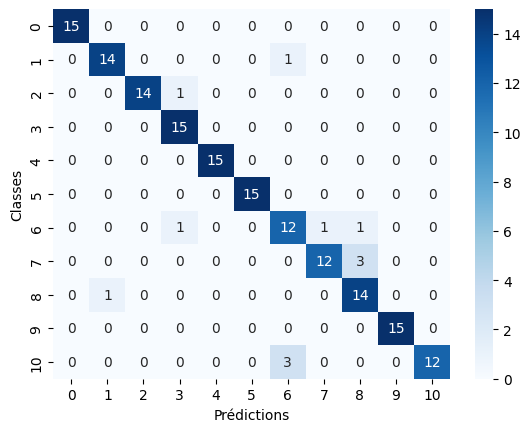

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Classes')
plt.savefig('cl2heatt.png')
files.download('cl2heatt.png')
plt.show()
